# Feature 1: Import CSV

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
fitbit = pd.read_csv("fitbit_activity.csv")
fitbit.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,6/9/2022,"1,881","8,690",3.56,0,"1,303",66,14,57,612
1,6/10/2022,"2,141","10,366",4.25,0,771,153,16,59,908
2,6/11/2022,"2,317","11,511",4.74,0,714,158,16,79,"1,077"
3,6/12/2022,"2,212","9,666",3.96,0,748,160,10,60,962
4,6/13/2022,"2,262","7,285",2.98,0,608,255,49,21,"1,100"


# Feature 2: Clean Data

1) Remove all commas

2) Convert to numeric

3) Re-add date column

In [52]:
fitbit.replace(',','', regex=True, inplace=True)

c = fitbit.select_dtypes(object).columns
fitbit[c] = fitbit[c].apply(pd.to_numeric,errors='coerce')
fitbit["Date"] = pd.date_range(start='6/9/2022', end='7/9/2022')
fitbit

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2022-06-09,1881,8690,3.56,0,1303,66,14,57,612
1,2022-06-10,2141,10366,4.25,0,771,153,16,59,908
2,2022-06-11,2317,11511,4.74,0,714,158,16,79,1077
3,2022-06-12,2212,9666,3.96,0,748,160,10,60,962
4,2022-06-13,2262,7285,2.98,0,608,255,49,21,1100
5,2022-06-14,1993,6288,2.58,0,760,182,3,27,739
6,2022-06-15,1877,3922,1.54,0,721,201,0,0,610
7,2022-06-16,2225,10041,4.04,0,707,215,37,30,1060
8,2022-06-17,1938,5904,2.39,0,705,241,0,0,733
9,2022-06-18,2396,10409,4.25,0,649,327,17,22,1289


# Feature 3: Analysis
Determine and print average scores for a month

In [58]:
calories_avg = fitbit["Calories Burned"].mean()
steps_avg = fitbit["Steps"].mean()
sedentary_avg = fitbit["Minutes Sedentary"].mean()
active_avg = fitbit["Minutes Very Active"].mean()

print(str(format(calories_avg, "0.2f")) + " daily calories burned in a month on average")
print(str(format(steps_avg, "0.2f")) + " daily steps in a month on average")
print(str(format(sedentary_avg, "0.2f")) + " daily minutes spent sitting/laying in a month on average")
print(str(format(active_avg, "0.2f")) + " daily high activity in a month on average")

2036.77 daily calories burned in a month on average
6967.23 daily steps in a month on average
841.26 daily minutes spent sitting/laying in a month on average
21.87 daily high activity in a month on average


# Feature 4: Plot Data

1) Time series of Date vs Calories Burned

2) Radar chart of daily achievements

<Figure size 432x288 with 0 Axes>

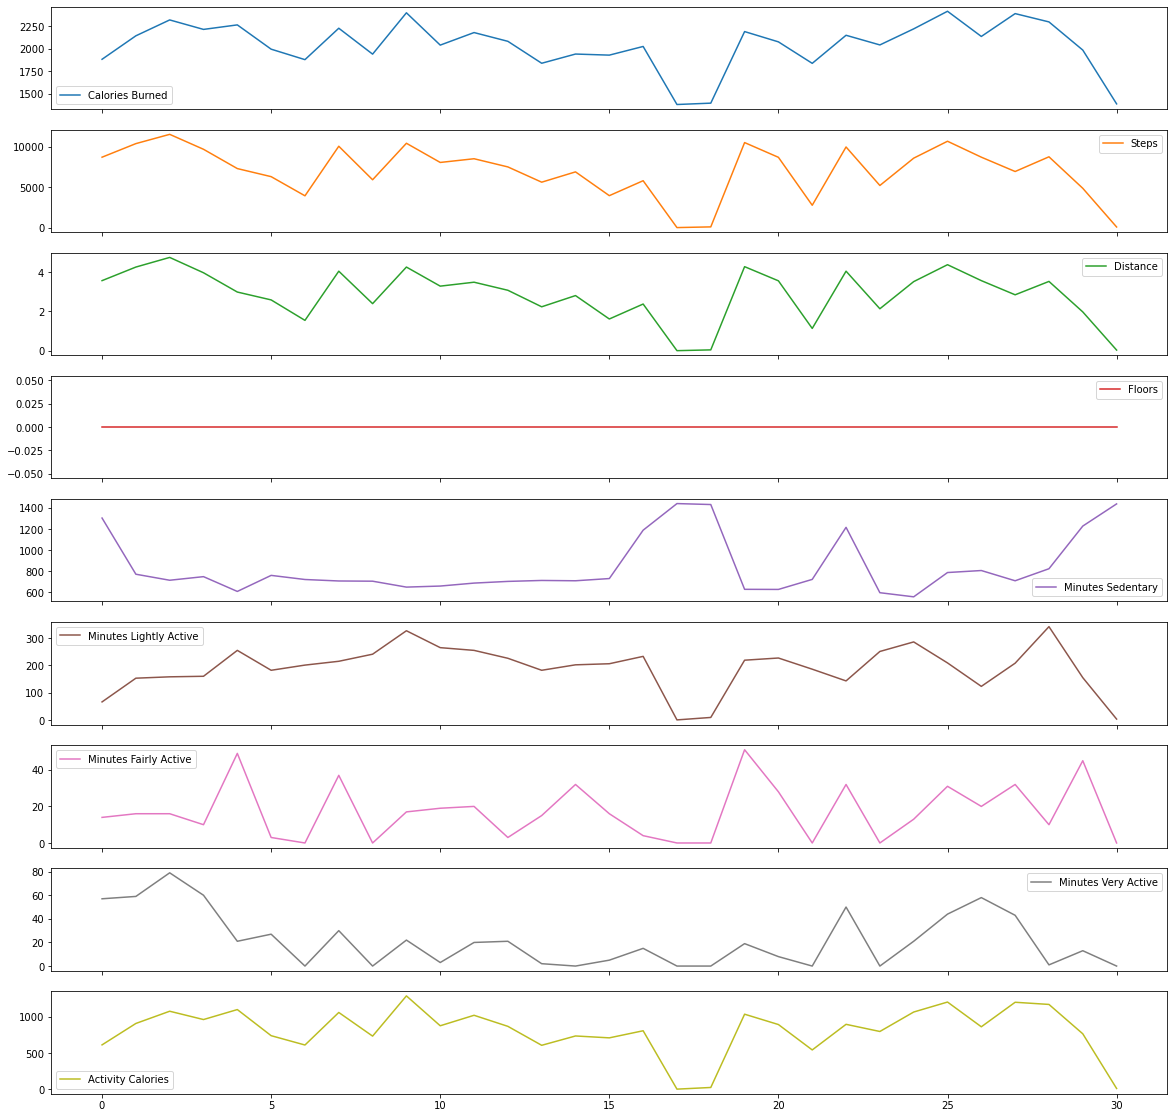

In [34]:
#fitbit = fitbit.cumsum()

plt.figure();

fitbit.loc[:, fitbit.columns != 'Date'].plot(subplots=True, figsize=(20, 20));

### Radar chart of single day scores

In [39]:
df = pd.DataFrame(dict(
    r=[1881, 8690, 1303, 66, 57],
    theta=['Calories Burned','Steps','Minutes Sedentary',
           'Minutes Lightly Active', 'Minutes Very Active']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

### Two-day radar chart of important metrics. This shows changes in multiple variables simultaneously, per day.

In [44]:
import plotly.graph_objects as go

categories = ['Calories Burned','Steps','Minutes Sedentary',
           'Minutes Lightly Active', 'Minutes Very Active']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1881, 8690, 1303, 66, 57],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[2141, 10366, 771, 153, 59],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    )),
  showlegend=False
)

fig.show()